****
<a id='lesson-2'></a>
# Module: Logistic Map

Prepared by Dr. Prabhakar Bhimalapuram, for "Computing in Sciences" course at Internationational Institute of Information Technology, Hyderabad
****

# Map:
Map is a mathematical construct that takes an object and returns another object of same type. Usually, the map is iterated multiple times to test for reaching a 'constant' value i.e. steady state

Example: the operation of a map $f$ may written as: <br>
  $x_1=f(x_0)$ <br>
where the map $f$ transform the input $x_0$ to its new value $x_1$.

****

# Concept: Phase plot of a map, and relation to stability of fixed point

Lets consider a simple linear map: $x_{n+1} = f(x_n)$ with $f(x) = m x $ . Now cleary $x=0$ is a fixed point. We will be trying to understand the `stability` of this map about the fixed point $x=0$. Let us consider the following cases for the map $x_{n+1}=f(x_n) = m x_n$:
1. $ |m| < 1 \implies -1 < m < 1$ : clearly $ |x_{n+1}| < |x_n|$ i..e. after the iteration, the point moves closer to the fixed point.  `Stable fixed point`
2. $ |m| > 1 \implies (m>1) \lor (m<-1)$: clearly $ |x_{n+1}| > |x_n|$ i.e. after iteration, the point moves father away from the fixed point `unstable fixed point`
3. $m >0$: clearly $ x_{n+1} $ and  $x_n$ remain on the same side of the fixed point `monotonic behaviour`
3. $m < 0$: clearly $x_{n+1}$ and $x_n$ differ in sign, i.e. after iteration the point jumps to other side of the fixed point. `osciallatory behaviour`

We looked at a linear map because we can Taylor expand any continious function as a linear function in the near neighbourhood of the fixed point, and by the above analysis, the behaviour near the fixed point thus depends on the slope of the map function $f(x)$ at the fixed point!

****

# Task-0: Graphical Analysis of Linear Map.

1. Linear map has $x_{n+1}=f(x_n)$ with $f(x) = mx$ where $m \in \mathcal{R}$ is a constant parameter.
2. First plot $x=y$ line and then plot $x_{n}$ vs $x_{n+1}$. Such a plot is known as Phase Plot. See the below following point on how to specifically plot it.
3. Specific methodology of plotting Phase Plot is typically favored to demostrate features of the map. Start with point $(x_0,0)$ on x-axis, then (a) draw a vertical line from $(x_n,x_n)$  with $n=0$ to point $(x_n,x_{n+1})$; (b) next step is to draw a horizontal from line to $(x_n,x_{n+1})$ to $(x_{n+1},x_{n+1})$. (c) Repeat the steps (a) and (b) incrementing $n$ by 1.

****

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize
import warnings

In [ ]:
def function(x_n, m):
    return m*x_n

In [ ]:
def phase_plot(m, x0, n_iter):
    x_vals = [x0]
    for _ in range(n_iter):
        x_vals.append(function(x_vals[-1], m))
    plt.plot(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100), 'g', label='y = x')
    plt.plot(np.linspace(-10, 10, 100), m*np.linspace(-10, 10, 100), 'b', label=f'y = {m}x')
    for i in range(len(x_vals) - 1):
        plt.plot([x_vals[i], x_vals[i]], [x_vals[i], x_vals[i+1]], 'r')
        plt.plot([x_vals[i], x_vals[i+1]], [x_vals[i+1], x_vals[i+1]], 'r')
    if m > 1:
        plt.xlim([0, 10])
        plt.ylim([0, 10])
    elif m < 1 and m > 0:
        plt.xlim([0, 0.1])
        plt.ylim([0, 0.1])
    elif m >-1 and m < 0:
        plt.xlim([-0.1, 0.1])
        plt.ylim([-0.1, 0.1])
    else:
        plt.xlim([-10, 10])
        plt.ylim([-10, 10])
    plt.xlabel('$x_n$')
    plt.ylabel('$x_{n+1}$')
    plt.title(f'Phase plot of the logistic map $x_{{n+1}} = f(x_n)$ for m = {m}')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

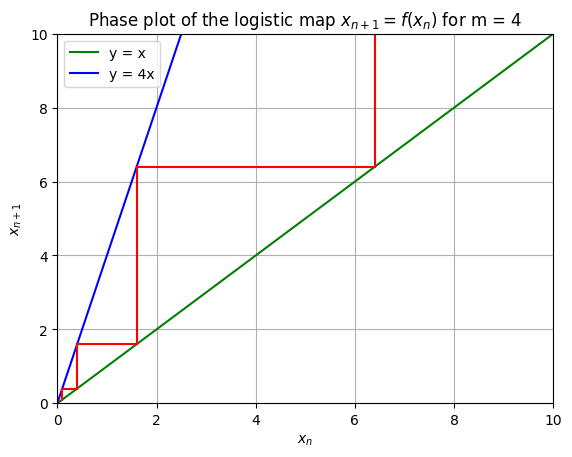

In [ ]:
phase_plot(4, 0.1, 500)

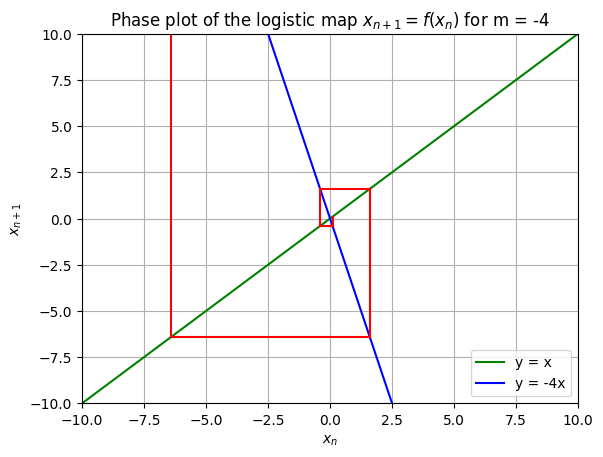

In [ ]:
phase_plot(-4, 0.1, 500)

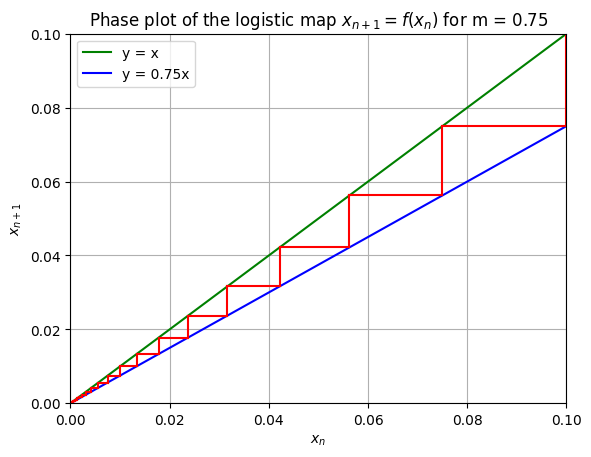

In [ ]:
phase_plot(0.75, 0.1, 500)

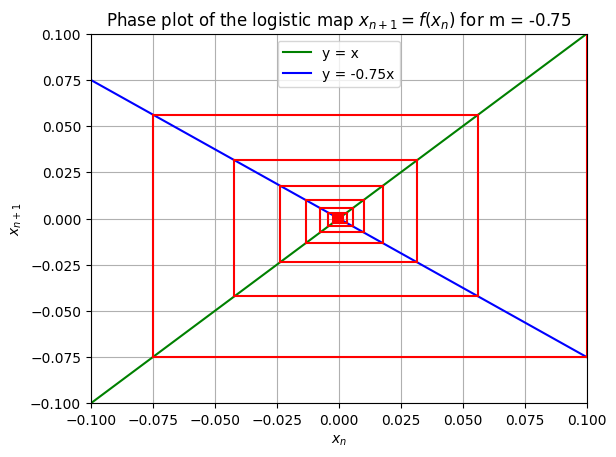

In [ ]:
phase_plot(-0.75, 0.1, 500)

****
# Logistical map
Logistic map is a quadratic map; i.e. $f(x)$ is a quadratic ploynomial.
It shows a particularly interesting phenomena of 'deterministic chaos' i.e. a deterministic map showing apparently random behaviour.  Logistic map has a single parameter, named $\alpha$, and is given by: <br>
$f(x)=\alpha x(1-x)$<br>
When $0\le \alpha \le 4$, the map takes an input $0\le x \le 1$ to give an output in the same range. For a particular value of the parameter $\alpha$, we want to find the behaviour of the map. For such systems, plot of $x_{n}$ vs $x_{n+1}$ is called phase plot and is a important tool for visualising and analysing such systems.

We will explore this in this tutorial using phase plots.

You can find good detail on Logistic Map at: https://en.wikipedia.org/wiki/Logistic_map

****

## Task-1: Logistal Map: $x_{n+1} = f(x_n)$ with $f(x) = \alpha x (1-x)$
Write a function that will take as input the following and output one or more of the tasks listed:
1. parameter value $\alpha$
1. starting value for $x$
1. number of iterations to run

Tasks:
1. Task is to plot the $n$ vs. $x_n$, where $x_n=f(x_{n-1})$ and $x_0=x$.
1. For a fixed $\alpha$ and do the above plot for various $0\le x_0 \le 1$.
1. Repeat above steps for the following values of $\alpha$: 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.25, 3.5
1. Comment

****

In [ ]:
def lm(x,alpha):
    '''lm(x,alpha) find the value of the map at postion x and parameter value alpha'''
    return alpha * x * (1-x)

In [ ]:
def lm_ncomp(x,alpha,n_iter):
    '''return the value of n_iterations of logistic map for given value of alpha'''
    for _ in range(n_iter):
        x = lm(x, alpha)
        if x is None:
            return 0
    return x

In [ ]:
def lm_seq(x0, alpha, n_iter):
    '''lm_seq(x0,alpha,n_iter): return a list of n_iter+1 iterates of the map starting from x0 with paramter value alpha'''
    nums = [x0]
    for _ in range(n_iter):
        x0 = lm(x0, alpha)
        nums.append(x0)
    return nums

In [ ]:
def lm_plot(x0, alpha, n_iter):
    '''lm_plot(x0,alpha,n_iter): return the plot of sequence of n_iter length starting from x0 with parameter alpha for the logistic map'''
    plt.plot(lm_seq(x0, alpha, n_iter), 'o')
    plt.title(f'Logistic Map Sequence: alpha={alpha}')
    plt.xlabel('Iteration')
    plt.ylabel('x')
    plt.ylim(0, 1)
    plt.grid()

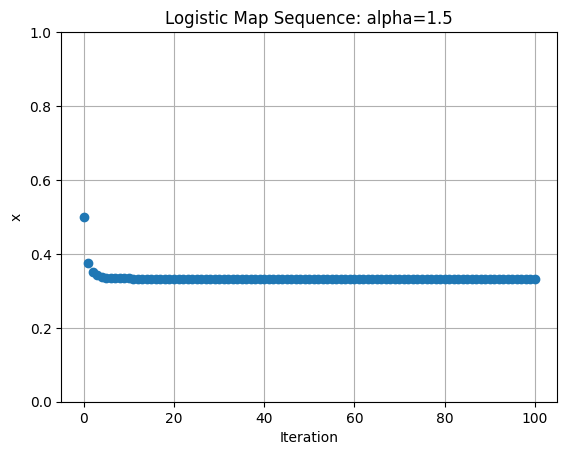

In [ ]:
lm_plot(0.5,1.5,100)

****
So that we can see behaviour for a range of $\alpha$ values we will use `matplotlib.pyplot.figure` object to have multiple plots in the same figure
****

Text(0.5, 0.98, 'Logistic Map for Different Alpha Values and for x0 = 0.5')

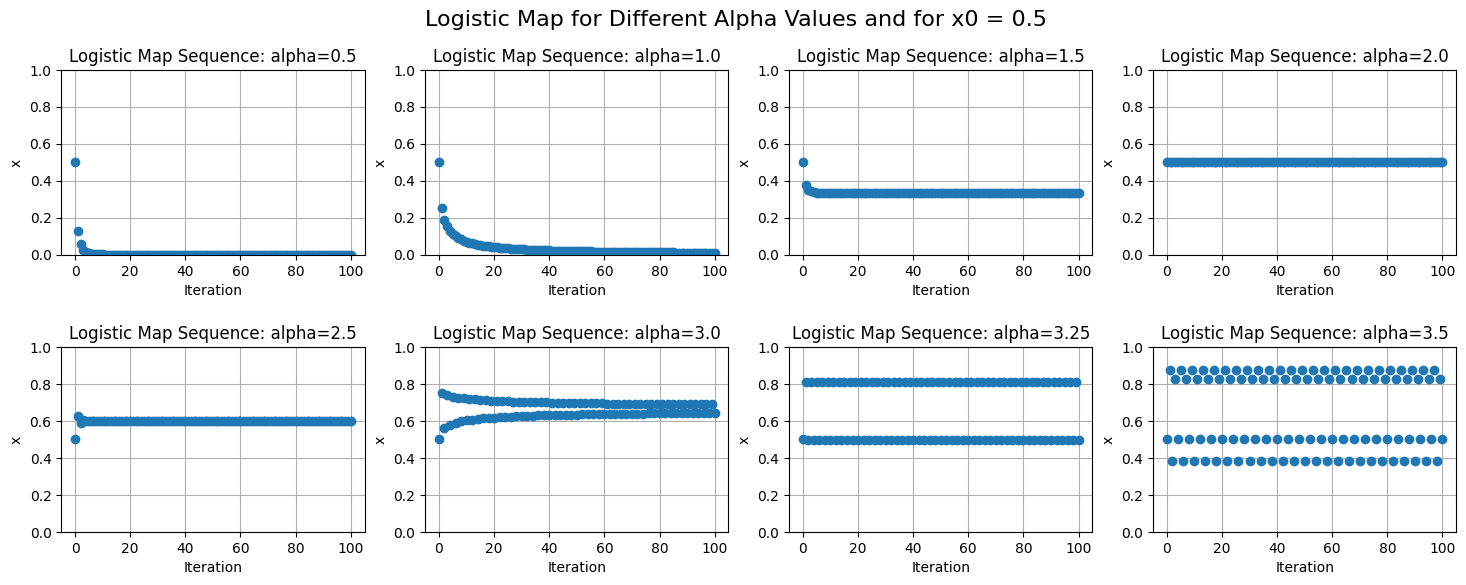

In [ ]:
x0=0.5
n_iter = 100
av = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.25, 3.5]
plt.figure(figsize=(18,6))
for i in range(1,9):
    plt.subplot(2,4,i)
    lm_plot(0.5,av[i-1],n_iter)
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Logistic Map for Different Alpha Values and for x0 = 0.5', fontsize=16)

### Task 1.4

Comments about the plots for various values of $\alpha$:

1. For $\alpha$ values between 0 and 1, the function quickly converges to 0 regardless of the initial value of $x_0$.

2. For $\alpha$ values between 1 and 3, the function converges to a single stable value that is not zero. The rate of convergence and the final stable value depend on the value of $\alpha$.

3. At $\alpha = 3$, the function begins to exhibit periodic behavior, oscillating between two values.

4. For $\alpha$ values greater than 3, the function exhibits chaotic behavior. It no longer settles into a stable state or a simple oscillation. Instead, it jumps unpredictably between values.

5. At certain "islands of stability", such as around $\alpha = 3.5$, the function returns to periodic behavior, oscillating among a larger set of values.

6. As $\alpha$ approaches 4, the function becomes increasingly chaotic, but it never repeats a value or falls into a simple oscillation.

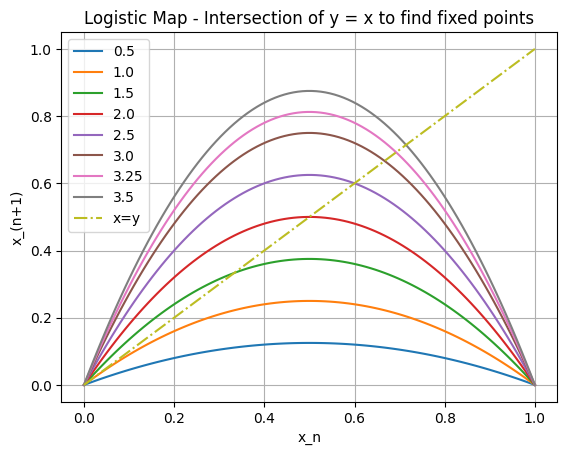

In [ ]:
xv = np.linspace(0,1,100)
for a in av:
    plt.plot(xv,lm(xv,a),label=str(a))
plt.plot([0,1],[0,1],'-.',label='x=y')
plt.xlabel('x_n')
plt.ylabel('x_(n+1)')
plt.grid()
plt.title('Logistic Map - Intersection of y = x to find fixed points')
plt.legend()

****
1. When $\alpha \le 1 $, we see $x_n = x_{n+1}$ only for one value $x_n = 0$! Also note the behavior of the slope of the map (i.e. $df/dx$) as $\alpha$ increases. This slope starts with zero value and then monotonically increases to $1$ when $\alpha=1$, and continues to increase with increasing $\alpha$.
2. When $\alpha > 1$, we see $x_n = x_{n+1}$ for two values $x_n=0$ and  a $\alpha$ dependent value. (Calculate this fixed point)
3. Interestingly, as $\alpha$ is increases, the slope of the curve at this **new** fixed point is monotonically decreasing from a postive to zero (at $\alpha=2$) and continues to decrease as $\alpha$ increases. So, at some point, this fixed point **also** becomes unstable!  
****

In [ ]:
# slope of the map f(x) = a * x * (1-x) is  a * (1 - 2*x)
def lm_diff(x, alpha):
    '''derivate of the map w.r.t. x '''
    return alpha * (1 - 2*x)

Text(0, 0.5, 'df/dx(x*, alpha)')

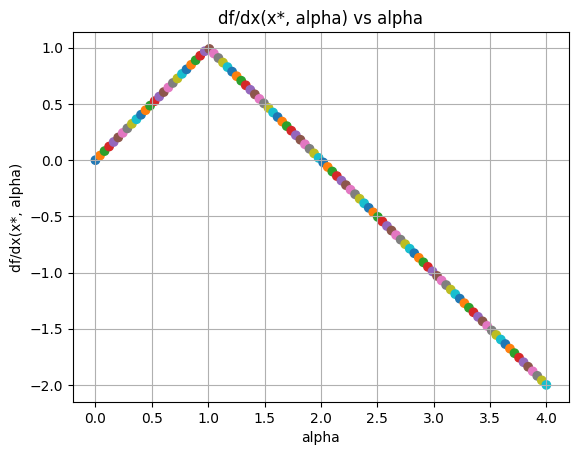

In [ ]:
alpha_values = np.linspace(0.00001, 4, 100)
fixed_points = np.where(alpha_values <= 1, 0, (alpha_values - 1) / alpha_values)
slopes = [lm_diff(fp, alpha) for fp, alpha in zip(fixed_points, alpha_values)]
colors = np.arange(len(alpha_values)) % 10
plt.scatter(alpha_values, slopes, c=colors, cmap='tab10')
plt.title('df/dx(x*, alpha) vs alpha')
plt.grid()
plt.xlabel('alpha')
plt.ylabel('df/dx(x*, alpha)')

****
Clearly we see that the fixed point become unstable for $\alpha>3.0$. So the map $f^{(1)}$ has no stable fixed points. We have to investigate the fixed points and their stabilty for $f^{(2)}$
****

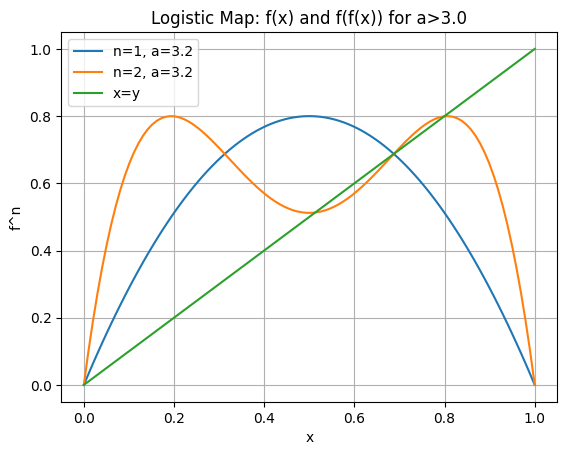

In [ ]:
# Plot $f(x)$ and $f(f(x))=f^(2)(x)$ for a>3.0
a = 3.2
for n in range(1, 3):
    plt.plot(xv, lm_ncomp(xv, a, n), label='n='+str(n)+', a='+str(a))
plt.plot([0, 1], [0, 1], label='x=y')
plt.grid()
plt.xlabel('x')
plt.ylabel('f^n')
plt.title('Logistic Map: f(x) and f(f(x)) for a>3.0')
plt.legend()

****
For $\alpha=3.2$, we have already seen that both fixed points of $f$ are unstable. However for the $f^{(2)}(x)$, interestingly there are three fixed points: one of it coincides with the unstable fixed point of $f(x)$, and the other two are `two new stable fixed points`!

This is the mechanism of `bifurcation`, were the unstable fixed point in $f^{(1)}$ splits to give rise to two new stable fixed points of $f^{(2)}(x)$. Now note that fixed points of $f^{(2)}(x)$ is a 2-cycle, i.e. there will be necessarily two solutions $x_1^*$ and $x_2^*$ such that
1. $x_2^* = f^{(2)}(x_1^*)$ and
1. $x_1^* = f^{(2)}(x_2^*)$
****

In [ ]:
def lm_PhasePlot(x0, alpha, n_iter=100, n_comp=1):
    '''For the logistic map, for the parameter value alpha,
    draw phase plot for n_iter steps starting with x0.
    When n_comp >1, phase plot is drawn for f o f o f ... (n_iter times) = f^(n)'''
    x_vals = [x0]
    for _ in range(n_iter):
        x_vals.append(lm_ncomp(x_vals[-1], alpha, n_comp))
    for i in range(len(x_vals) - 1):
        plt.plot([x_vals[i], x_vals[i]], [x_vals[i], x_vals[i+1]], 'r')
        plt.plot([x_vals[i], x_vals[i+1]], [x_vals[i+1], x_vals[i+1]], 'r')
    x = np.linspace(0, 1, 100)
    plt.plot(x, lm_ncomp(x, alpha, n_comp), label='f^('+str(n_comp)+')(x)')
    plt.plot(x, x, 'b', label='x=f^('+str(n_comp)+')(x)')
    plt.xlabel('x_n')
    plt.ylabel('x_(n+'+str(n_comp)+')')
    plt.grid()
    plt.legend()
    plt.title('Phase plot for alpha = ' + str(alpha))

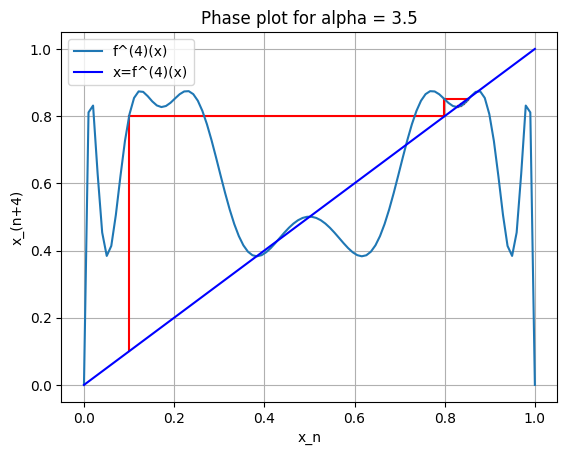

In [ ]:
lm_PhasePlot(0.1,3.5,n_comp=4)

****
## Task-2
1. Write a function that will take values for $x$, $\alpha$ and the number of steps and plot the Phase Plot for these steps. Note fixed points are given by $f(x) = x $
2. Use `scipy.optimizie.fixed_point` to find the fixed points  for given $\alpha$
****

In [ ]:
def lm_fixedPoint(x0, alpha, n_iter=100):
    '''find the fixed point of n_iter iterations of the logistic map with starting point x0'''
    def func(x):
        return lm(x, alpha)
    fixed_pt = scipy.optimize.fixed_point(func, x0, xtol=1e-8, maxiter=n_iter)
    return fixed_pt

In [ ]:
av_linspace = np.linspace(0,4,100)
fp = []
for a in av_linspace:
    try:
        fp.append(lm_fixedPoint(0.5, a))
    except RuntimeError:
        fp.append(None)

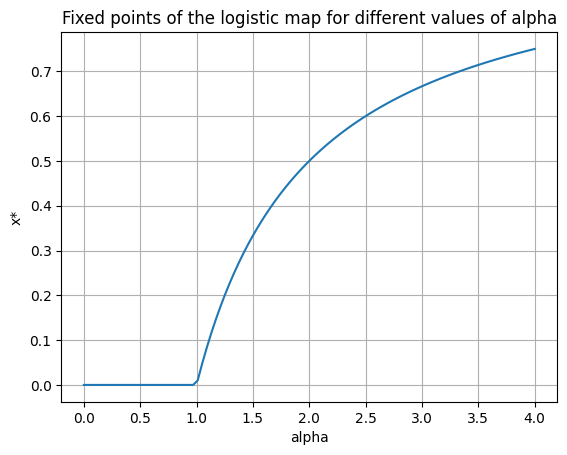

In [ ]:
plt.plot(av_linspace,fp)
plt.xlabel('alpha')
plt.ylabel('x*')
plt.title('Fixed points of the logistic map for different values of alpha')
plt.grid()

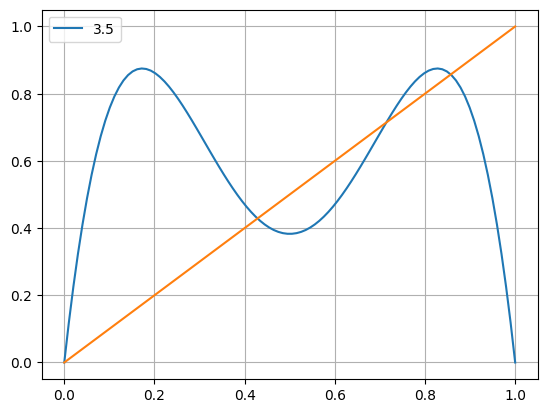

In [ ]:
#plot x vs f(f(x))
a=3.5
plt.plot(xv,lm(lm(xv,a),a),label=str(a))
plt.plot(xv,xv)
plt.grid()
plt.legend()

In [ ]:
alpha=3.5
n_comp=1
xs = scipy.optimize.fixed_point(lm_ncomp,0.5,args=(alpha,n_comp))

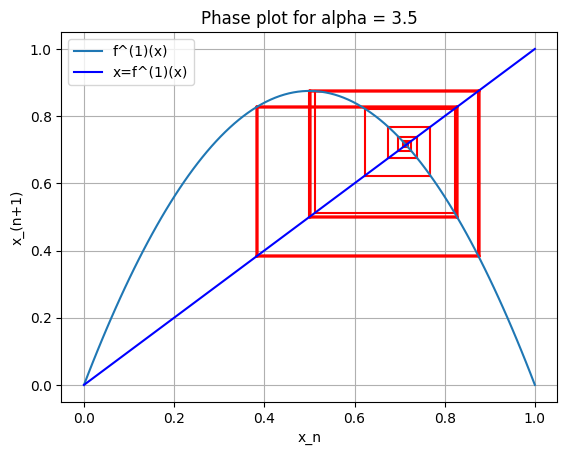

In [ ]:
# check stability at that point after a small perturbation
lm_PhasePlot(xs+0.001, alpha)

****
## Task-3
Write a function, for a particular value of $\alpha$, to determine steady states and cycles (lets denote these values as $x^*(\alpha)$. For this we have to consider $f(x)$, $f(f(x))=f^2(x)$, $f^3(x)$,...,$f^n(x)$ and find fixed points of $f^n(x)$.
****

### Strategy to solve this task: to find the steady-state or cycle for a given $\alpha$
1. Find root of $f^{(n)}=x$, where $f^{(n)}$ is the $n^{th}$ iteration of the map; i.e. $f^{(3)}(x)=f(f(f(x)))$ using `scipy.optimize.fixed_point`
2. Check the stability of the root
1. If all roots are unstable, then increase n by 1 and goto step 1
1. If even one root is stable, then we have found the steady-state/cycle.

and use `scipy.optimize.fixed_point`

Please note that the derivative of the $f^{(n)}(x)$ w.r.t $x$ can be calculated as follows:

Lets denote $x_0=x$,  and $x_{n+1} = f(x_n)$ for $n \ge 0$. Then $ \frac{d}{dx} f^{(n+1)}(x) = \frac{d }{dx} f(x_n) = \frac{d}{dx_n} f(x_n)\times \frac{d x_n}{dx} = \left[\alpha (1-2 x_{n})\right] \frac{d}{dx} f^{(n)}(x) $; which is a recursive formula for the derivative!

The recursive formula is thus:
 $$\frac{d}{dx} f^{(n)}(x) = f^\prime(x_{n-1})~f^\prime(x_{n-2})~\cdots f^\prime(x_{2})~ f^\prime(x_{1})~f^\prime(x_0) = \prod_{i=0}^{n-1}f^\prime(x_i)$$
 where $x_0=x$ and $x_n=f^{(n)}(x_0)$ and $f^\prime(x)=\alpha (1-2x) $

****

In [ ]:
def lm_getFixedPoints(alpha, n):
    '''lm_getFixedPoints(alpha, n): return the fixed points of the logistic map for parameter value alpha'''
    fixed_points = []
    for x0 in np.linspace(0, 1, 100):
        try:
            fixed_points.append(lm_fixedPoint(x0, alpha, n))
        except RuntimeError:
            fixed_points.append(None)
    return fixed_points

In [ ]:
def lm_deriv(x0, alpha, n_comp=1, h=1e-6):
    '''return the value the derivative at x0 of the f o f o f... (n_comp times ) i.e. of f^(n_comp)'''
    def func(x):
        return lm_ncomp(x, alpha, n_comp)
    return (func(x0 + h) - func(x0 - h)) / (2.0 * h)

In [ ]:
x0=0.6
alpha=3.5
n_comp=1
l1=lm_seq(x0,alpha,n_comp)
l2=[lm_diff(x,alpha) for x in l1]
print("l1 ",l1)
print("l2 ",l2)
print("derivative =", np.prod(l2))

l1  [0.6, 0.8400000000000001]
l2  [-0.6999999999999998, -2.380000000000001]
derivative = 1.6660000000000001


In [ ]:
lm_deriv(x0,alpha,4)

-0.8987274671135026

In [ ]:
def derivative_iterate(x, alpha, n):
    derivative_product = 1
    for _ in range(n):
        derivative_product *= lm_deriv(x, alpha)
        x = lm(x, alpha)
    return derivative_product

In [ ]:
def find_steady_state(alpha, n_max=100):
    for n in range(1, n_max+1):
        root = scipy.optimize.fixed_point(lm_ncomp, 0.5, args=(alpha, n))
        if abs(derivative_iterate(root, alpha, n)) < 1:
            return root, n
    return None, None

In [ ]:
alpha_values = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.25, 3.5]
for alpha in alpha_values:
    root, n = find_steady_state(alpha)
    if root is not None:
        print(f"For alpha={alpha}, found steady state/cycle at x={root} after {n} iterations")
    else:
        print(f"For alpha={alpha}, did not find a steady state/cycle after {n} iterations")

For alpha=0.5, found steady state/cycle at x=0.0 after 1 iterations
For alpha=1.0, found steady state/cycle at x=3.7416079336843815e-09 after 1 iterations
For alpha=1.5, found steady state/cycle at x=0.3333333333333333 after 1 iterations
For alpha=2.0, found steady state/cycle at x=0.5 after 1 iterations
For alpha=2.5, found steady state/cycle at x=0.6 after 1 iterations
For alpha=3.0, found steady state/cycle at x=0.6665691842254976 after 2 iterations
For alpha=3.25, found steady state/cycle at x=0.4952651682454743 after 2 iterations
For alpha=3.5, found steady state/cycle at x=0.500884210307218 after 4 iterations


****
## Task-4
Plot $\alpha$ vs $x^*(\alpha)$. Comment.
****

#### This plot is for stable fixed points for various x0 and alpha values

/tmp/ipykernel_11643/845909597.py:3: RuntimeWarning: overflow encountered in scalar multiply
  return alpha * x * (1-x)
/home/oem/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1078: RuntimeWarning: invalid value encountered in scalar subtract
  d = p2 - 2.0 * p1 + p0
/home/oem/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1065: RuntimeWarning: overflow encountered in square
  return p0 - np.square(p1 - p0) / d
/home/oem/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1065: RuntimeWarning: invalid value encountered in divide
  return p0 - np.square(p1 - p0) / d


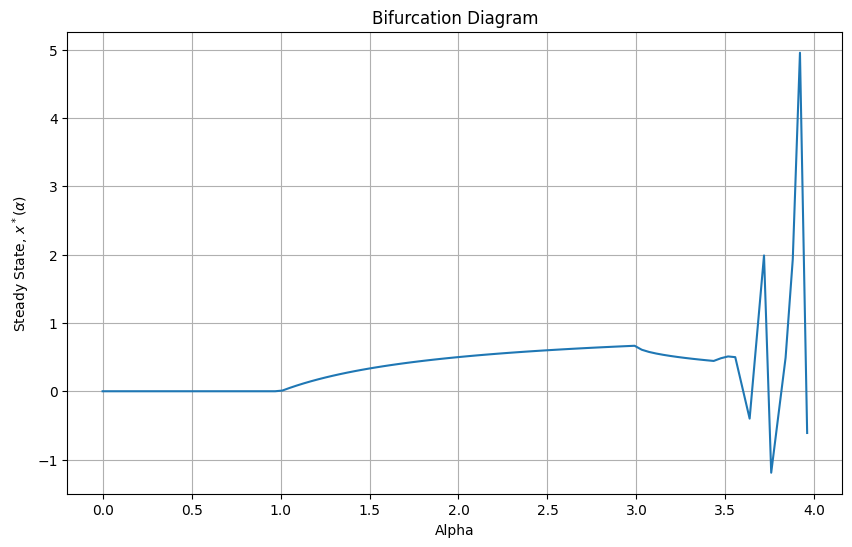

In [ ]:
alpha_values = np.linspace(0.000001, 4.0, 100)
x_star_values = []
for alpha in alpha_values:
    try:
        x_star_values.append(find_steady_state(alpha)[0])
    except RuntimeError:
        x_star_values.append(None)

alpha_values = [alpha for alpha, x_star in zip(alpha_values, x_star_values) if x_star is not None]
x_star_values = [x_star for x_star in x_star_values if x_star is not None]

alpha_values = [alpha for alpha, x_star in zip(alpha_values, x_star_values) if x_star is not None]
x_star_values = [x_star for x_star in x_star_values if x_star is not None]

plt.figure(figsize=(10, 6))
plt.plot(alpha_values, x_star_values)
plt.xlabel('Alpha')
plt.ylabel('Steady State, $x^*(\\alpha)$')
plt.title('Bifurcation Diagram')
plt.grid()

#### This plot is for lm values for various alpha

In [ ]:
def bifurcation_diagram(x0, alpha_start, alpha_end, n_iter, n_skip):
    alpha_values = np.linspace(alpha_start, alpha_end, 1000)
    x = x0 * np.ones_like(alpha_values)
    for _ in range(n_skip):
        x = lm(x, alpha_values)
    for _ in range(n_iter):
        x = lm(x, alpha_values)
        plt.plot(alpha_values, x, ',k', alpha=.25)
    plt.title('Bifurcation diagram')
    plt.xlabel('Alpha')
    plt.ylabel('x')
    plt.grid()

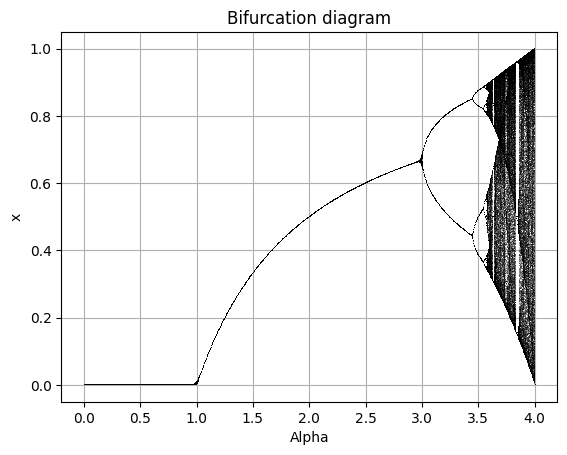

In [ ]:
bifurcation_diagram(x0=0.5, alpha_start=0, alpha_end=4.0, n_iter=1000, n_skip=100)

### Comments about alpha vs x*(alpha)

The plot of alpha vs x*(alpha) is known as a bifurcation diagram for the logistic map. This diagram provides a graphical representation of the different states of the system for varying values of the parameter alpha.

For low values of alpha, the system has a single stable fixed point. This corresponds to the stable population in the logistic map interpretation.

As alpha increases, the system undergoes a bifurcation and now has two stable fixed points. This represents a population oscillating between two states.

Further increases in alpha lead to more bifurcations, with the system oscillating between 4, 8, 16, etc. states. This period-doubling route to chaos is a common route to chaos in nonlinear dynamical systems.

At even higher values of alpha, the system becomes chaotic, oscillating unpredictably between many states. This chaotic behavior is sensitive to initial conditions, a hallmark of chaos.

****
## Task-5
Find the ratio between two consequtive bifurcations (Feigenbaum Constant)
****

In [ ]:
def calculate_feigenbaum(alpha_start, alpha_end):
    bifurcation_points = []
    feigenbaum_values = []
    prev_steady_state = None
    for alpha in np.linspace(alpha_start, alpha_end, 10000):
        try:
            steady_state, _ = find_steady_state(alpha)
        except RuntimeError:
            continue
        if steady_state is not None:
            if prev_steady_state is None or abs(steady_state - prev_steady_state) > 0.01:
                bifurcation_points.append(alpha)
                if len(bifurcation_points) > 2:
                    feigenbaum_value = (bifurcation_points[-2] - bifurcation_points[-3]) / (bifurcation_points[-1] - bifurcation_points[-2])
                    feigenbaum_values.append(feigenbaum_value)
            prev_steady_state = steady_state
    feigenbaum_constant = np.mean(feigenbaum_values)
    print(f"Feigenbaum constant: {feigenbaum_constant}")

In [ ]:
calculate_feigenbaum(0.5, 4.0)

/tmp/ipykernel_11643/845909597.py:3: RuntimeWarning: overflow encountered in scalar multiply
  return alpha * x * (1-x)


Feigenbaum constant: 4.326932936116647


In [1]:
import numpy as np

def logistic_map(x, alpha, n_iter):
    '''Compute the logistic map for n iterations'''
    final = x
    for _ in range(n_iter):
        final = alpha * final * (1 - final)
    return final

def find_bifurcation_points(alpha_start, alpha_end, num_iterations):
    '''Find the bifurcation points of the logistic map'''
    bifurcation_points = []
    prev_x = None
    for alpha in np.linspace(alpha_start, alpha_end, 10000):
        x = 0.5  # Initial condition
        for _ in range(num_iterations):
            x = logistic_map(x, alpha, 100)
        if prev_x is not None and abs(x - prev_x) > 0.0001:
            bifurcation_points.append(alpha)
        prev_x = x
    return bifurcation_points

def calculate_feigenbaum(alpha_start, alpha_end):
    '''Calculate the Feigenbaum constant'''
    bifurcation_points = find_bifurcation_points(alpha_start, alpha_end, 100)
    feigenbaum_values = []
    for i in range(2, len(bifurcation_points)):
        delta_alpha = bifurcation_points[i] - bifurcation_points[i - 1]
        delta_alpha_prev = bifurcation_points[i - 1] - bifurcation_points[i - 2]
        feigenbaum_value = delta_alpha / delta_alpha_prev
        feigenbaum_values.append(feigenbaum_value)
    feigenbaum_constant = np.mean(feigenbaum_values)
    print(f"Feigenbaum constant: {feigenbaum_constant}")

calculate_feigenbaum(2.38, 3.6)

Feigenbaum constant: 4.674439070456906
